In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('HR_data.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.shape

(14999, 10)

## Data Preprocessing:
The sales are salary features are not numeric. So we need to do some preprocessing to convert them to numbers.

In [4]:
df1 = df.copy()
df1['salary'] = pd.factorize(df1['salary'])[0]
df1['sales'] = pd.factorize(df1['sales'])[0]

In [5]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0


In [6]:
# importing sweetviz
import sweetviz as sv

#analyzing the dataset
HR_report = sv.analyze(df1)

#display the report
HR_report.show_html('HR_Analytics.html')

:FEATURES DONE:                    |█████████████████████| [100%]   00:05  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:01  -> (00:00 left)


Creating Associations graph... DONE!
Report HR_Analytics.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [7]:
correlation_matrix = df1.corr(method='pearson')
correlation_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.015413,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.011855,-0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.005577,-0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002387,-0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.001611,0.048715
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.019215,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.043814,-0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.015170,0.098119
sales,0.015413,0.011855,0.005577,-0.002387,-0.001611,0.019215,-0.043814,0.015170,1.000000,0.033415
salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,0.033415,1.000000


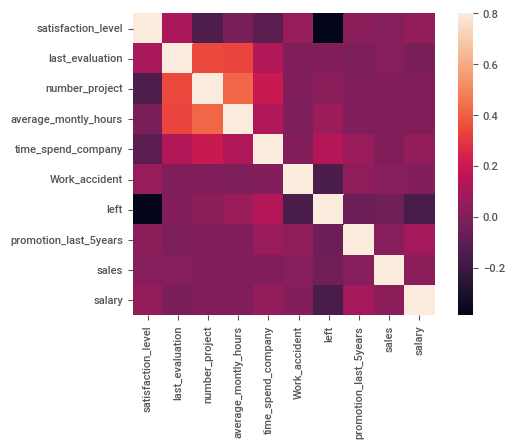

In [8]:
# To plot the correlation_matrix:
import seaborn as maps
maps.heatmap(correlation_matrix, vmax = .8, square = True)
plt.show()

In [9]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

#import for interactive plotting
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
%matplotlib inline

In [10]:
def categorical_column_viz(col_name):
    
    f,ax = plt.subplots(1,2, figsize=(10,6))
  
    # Count Plot
    df[col_name].value_counts().plot.bar(cmap='Set2',ax=ax[0])
    ax[1].set_title(f'Number of Employee by {col_name}')
    ax[1].set_ylabel('Count')
    ax[1].set_xlabel(f'{col_name}')
    
    # Attrition Count per factors
    sns.countplot(col_name, hue='left',data=df, ax=ax[1], palette='Set2')
    ax[1].set_title(f'Attrition by {col_name}')
    ax[1].set_xlabel(f'{col_name}')
    ax[1].set_ylabel('Count')

C:\Users\Amit\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



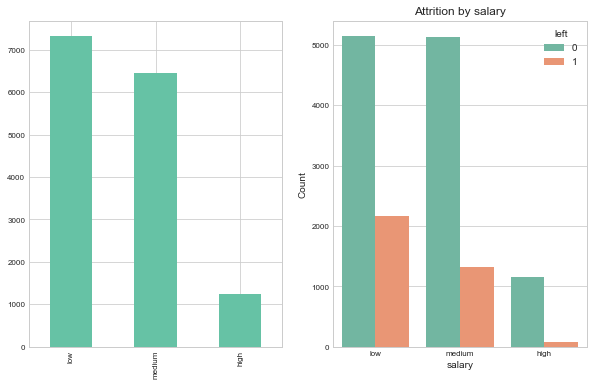

In [11]:
categorical_column_viz('salary')

C:\Users\Amit\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



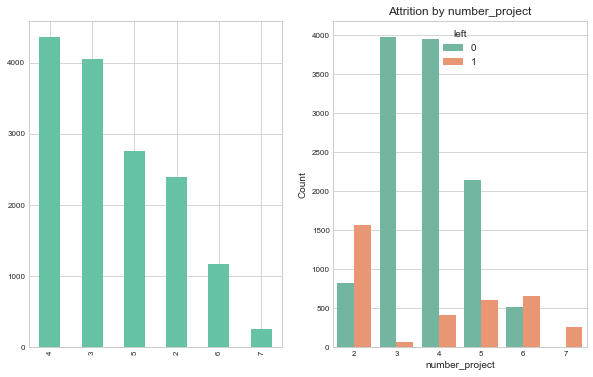

In [12]:
categorical_column_viz('number_project')

C:\Users\Amit\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



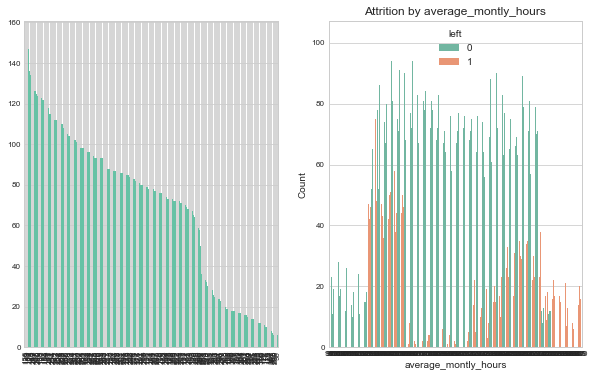

In [13]:
categorical_column_viz('average_montly_hours')

C:\Users\Amit\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



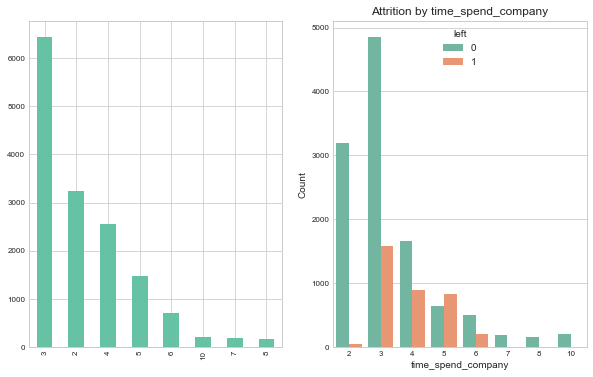

In [14]:
categorical_column_viz('time_spend_company')

C:\Users\Amit\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



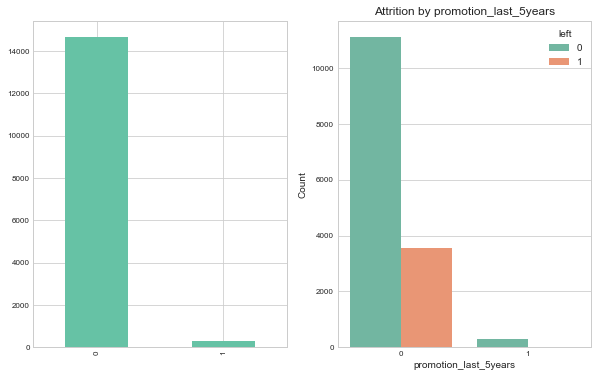

In [15]:
categorical_column_viz('promotion_last_5years')

C:\Users\Amit\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



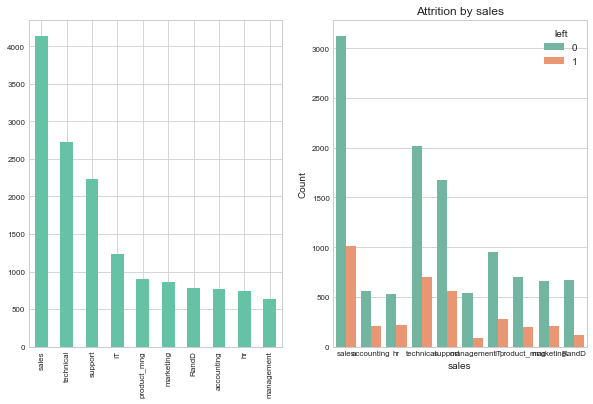

In [16]:
categorical_column_viz('sales')

In [17]:
def numerical_column_viz(col_name):
    f,ax = plt.subplots(1,2, figsize=(18,6))
    sns.kdeplot(df1[col_name], label='Employee who left',ax=ax[0], shade=True, color='palegreen')
    sns.kdeplot(df1[col_name], label='Employee who stayed', ax=ax[0], shade=True, color='salmon')
    
    sns.boxplot(y=col_name, x='left',data=df, palette='Set3', ax=ax[1])

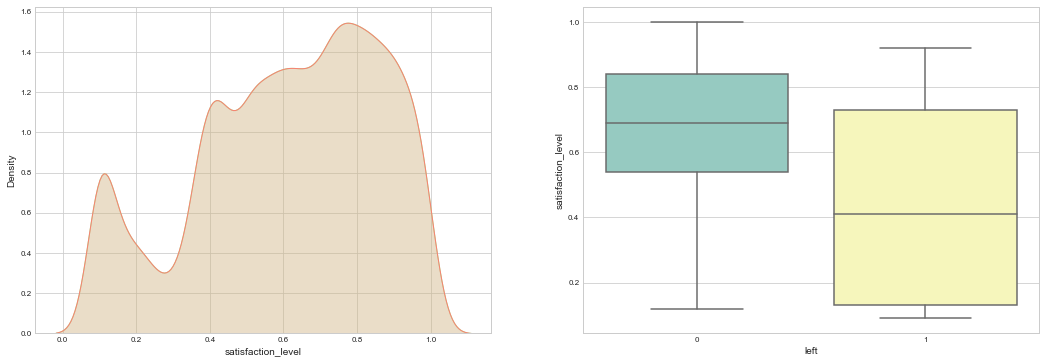

In [18]:
numerical_column_viz("satisfaction_level")

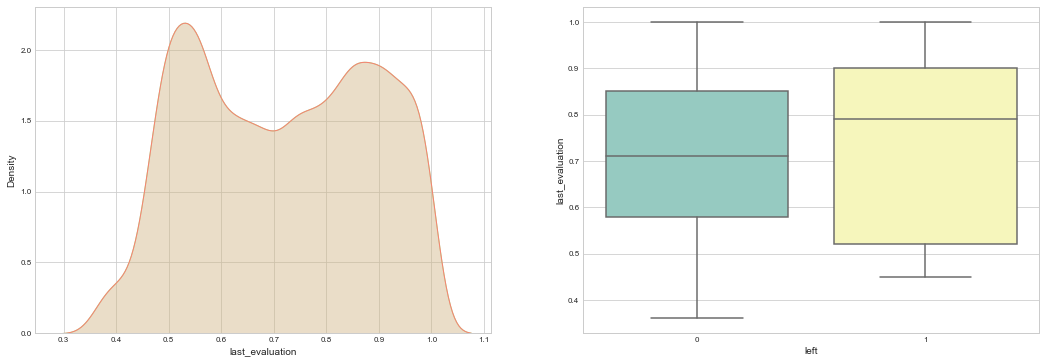

In [19]:
numerical_column_viz("last_evaluation")

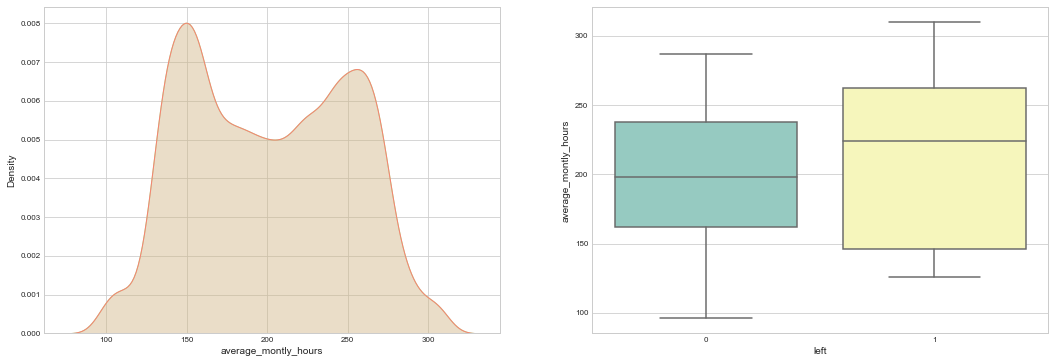

In [20]:
numerical_column_viz("average_montly_hours")

<AxesSubplot:xlabel='salary', ylabel='left'>

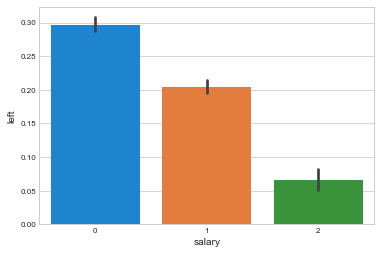

In [21]:
maps.barplot(x = 'salary', y = 'left', data = df1)

Observations from the above graphs:

People who have got low evaluation scores are more likely to leave
People who have moderate satisfaction level (0.4) are more likely to leave.
People who work for more than 6 years or less than 2 years are less likely to leave.

## Preprocess data for different classifiers:

In [22]:
x = df1.drop("left",axis=1)
y = df1['left']
print(x.shape,y.shape)

(14999, 9) (14999,)


In [23]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 0) 

In [24]:
#Doing standard scaling to get the mean and variance 

from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler() 
xtrain = sc_x.fit_transform(xtrain)  
xtest = sc_x.transform(xtest) 

## 1. Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression 
classifierLR = LogisticRegression(random_state = 0) 
classifierLR.fit(xtrain, ytrain) 

LogisticRegression(random_state=0)

In [26]:
y_predLR = classifierLR.predict(xtest)

In [27]:
from sklearn.metrics import confusion_matrix 
cmLR = confusion_matrix(ytest, y_predLR) 
  
print ("Confusion Matrix : \n", cmLR) 

Confusion Matrix : 
 [[3194  268]
 [ 669  369]]


In [28]:
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(ytest, y_predLR)) 

Accuracy :  0.7917777777777778


## 2. Random Forest

In [29]:
# Fitting the classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifierRF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state= 0)
classifierRF.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [30]:
ypredRF = classifierRF.predict(xtest)

In [31]:
from sklearn.metrics import confusion_matrix
cmRF = confusion_matrix(ytest, ypredRF)
print ("Confusion Matrix : \n", cmRF)

Confusion Matrix : 
 [[3448   14]
 [  39  999]]


In [32]:
print ("Accuracy : ", accuracy_score(ytest, ypredRF))

Accuracy :  0.9882222222222222


In [33]:
print("Training score:",classifierRF.score(xtrain,ytrain))
print("Testing score:",classifierRF.score(xtest,ytest))

Training score: 0.9981903038384609
Testing score: 0.9882222222222222


As we can see that the model is performing good on Training dataset and on test 
dataset which shows that model is neither overfit nor underfit.

### Factors contributing to satisfaction level

In [34]:
# Create a dataframe for employees who left.
left_df = df1[df1['left'] == 1]

# Create a dataframe for employees who stayed.
stay_df = df1[df1['left'] == 0]

In [35]:
# Difference in job satisfaction between the two groups.
attrition_satisfaction = round(left_df['satisfaction_level'].mean(), 2)
retention_satisfaction = round(stay_df['satisfaction_level'].mean(), 2)

In [36]:
# Factors contributing to satisfaction levels among staff who left.
print (left_df.corr(method='pearson')['satisfaction_level'][1:].sort_values(ascending=False))

time_spend_company       0.446440
last_evaluation          0.182295
Work_accident            0.005864
sales                    0.005602
promotion_last_5years    0.005516
salary                  -0.005837
average_montly_hours    -0.084117
number_project          -0.227113
left                          NaN
Name: satisfaction_level, dtype: float64


For satisfaction_level of employee who left the company, from the above correlation we can deduce: 
* <b>Time spent at the company</b> and the <b>number of projects worked on</b>, have the greatest impact. 
* Employee’s  <b>average monthly hours</b> and their  <b>last evaluation</b> also have significant impact 

In [37]:
# Factors contributing to satisfaction levels among staff who stay.
print (stay_df.corr(method='pearson')['satisfaction_level'][1:].sort_values(ascending=False))

last_evaluation          0.086357
average_montly_hours     0.055354
promotion_last_5years    0.001228
Work_accident           -0.003128
sales                   -0.004398
salary                  -0.014700
number_project          -0.092799
time_spend_company      -0.168791
left                          NaN
Name: satisfaction_level, dtype: float64


In [38]:
# Factors correlated to satisfaction_level
correlations2 = df1.corr(method='pearson')
satisfaction_df = correlations2['satisfaction_level'][1:].abs().sort_values(ascending=False)
satisfaction_df = satisfaction_df.drop('left')
print(satisfaction_df)

number_project           0.142970
last_evaluation          0.105021
time_spend_company       0.100866
Work_accident            0.058697
salary                   0.050022
promotion_last_5years    0.025605
average_montly_hours     0.020048
sales                    0.015413
Name: satisfaction_level, dtype: float64


<b>number_project</b>, <b>last_evaluation</b> and <b>time_spend_company</b> are the top three factors contributing to high satisfaction level amongst employees

## Random Forest performs well

In [39]:
import pickle
# save the model to disk
filename = 'hr_model.sav'
pickle.dump(classifierRF, open(filename, 'wb'))

In [40]:
k = x.iloc[50]
k

satisfaction_level         0.13
last_evaluation            0.78
number_project             6.00
average_montly_hours     152.00
time_spend_company         2.00
Work_accident              0.00
promotion_last_5years      0.00
sales                      4.00
salary                     0.00
Name: 50, dtype: float64

In [41]:
classifierRF.predict(pd.Series(k).values.reshape(-1,1).T)

array([1], dtype=int64)